In [ ]:
# Google Colab is recommended

# Your file will be in '/content/datasets/runs/detect/train/weights/'
# - Select best.pt or last.pt that matches your purpose

In [ ]:
# Check graphic card
!nvidia-smi

Fri Aug  4 23:23:46 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8    12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Install YOLOv8

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (4 CPUs, 25.5 GB RAM, 24.4/166.8 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

# Prepare Custom Dataset

### Step 1: Creating project

Before you start, you need to create a Roboflow [account](https://app.roboflow.com/login). Once you do that, you can create a new project in the Roboflow [dashboard](https://app.roboflow.com/). Keep in mind to choose the right project type. In our case, Object Detection.

<div align="center">
  <img
    width="640"
    src="https://ik.imagekit.io/roboflow/preparing-custom-dataset-example/creating-project.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929799852"
  >
</div>

### Step 2: Uploading images

Next, add the data to your newly created project. You can do it via API or through our [web interface](https://docs.roboflow.com/adding-data/object-detection).

If you drag and drop a directory with a dataset in a supported format, the Roboflow dashboard will automatically read the images and annotations together.

<div align="center">
  <img
    width="640"
    src="https://ik.imagekit.io/roboflow/preparing-custom-dataset-example/uploading-images.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929808290"
  >
</div>

### Step 3: Labeling

If you only have images, you can label them in [Roboflow Annotate](https://docs.roboflow.com/annotate).

<div align="center">
  <img
    width="640"
    src="https://user-images.githubusercontent.com/26109316/210901980-04861efd-dfc0-4a01-9373-13a36b5e1df4.gif"
  >
</div>

### Step 4: Generate new dataset version

Now that we have our images and annotations added, we can Generate a Dataset Version. When Generating a Version, you may elect to add preprocessing and augmentations. This step is completely optional, however, it can allow you to significantly improve the robustness of your model.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/generate-new-version.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1673003597834"
  >
</div>

### Step 5: Exporting dataset

Once the dataset version is generated, we have a hosted dataset we can load directly into our notebook for easy training. Click `Export` and select the `YOLO v5 PyTorch` dataset format.

<div align="center">
  <img
    width="640"
    src="https://ik.imagekit.io/roboflow/preparing-custom-dataset-example/export.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672943313709"
  >
</div>

In [ ]:
import os
os.chdir("/content")
!ls

In [ ]:
!mkdir /content/datasets
%cd /content/datasets

/content/datasets


In [ ]:
!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="cmNWRa1V7rzhpw9xRL7s")
project = rf.workspace("project-trrgd").project("cat-stove-alert")
dataset = project.version(2).download("yolov8")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 90.7 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.134`


Extracting Dataset Version Zip to Cat-stove-alert-2 in yolov8:: 100%|██████████| 14752/14752 [00:02<00:00, 6415.60it/s]


# Custom Training

In [ ]:
%cd /content/datasets

!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=200 imgsz=640 plots=True optimizer='Adam' patience=15

/content/datasets
100% 6.23M/6.23M [00:00<00:00, 291MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/datasets/Cat-stove-alert-2/data.yaml, epochs=200, patience=15, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchsc

In [ ]:
!ls /content/datasets/runs/detect/train/

args.yaml					    train_batch2.jpg
confusion_matrix.png				    train_batch60420.jpg
events.out.tfevents.1691191553.38938fc72ff4.6285.0  train_batch60421.jpg
F1_curve.png					    train_batch60422.jpg
P_curve.png					    val_batch0_labels.jpg
PR_curve.png					    val_batch0_pred.jpg
R_curve.png					    val_batch1_labels.jpg
results.csv					    val_batch1_pred.jpg
results.png					    val_batch2_labels.jpg
train_batch0.jpg				    val_batch2_pred.jpg
train_batch1.jpg				    weights


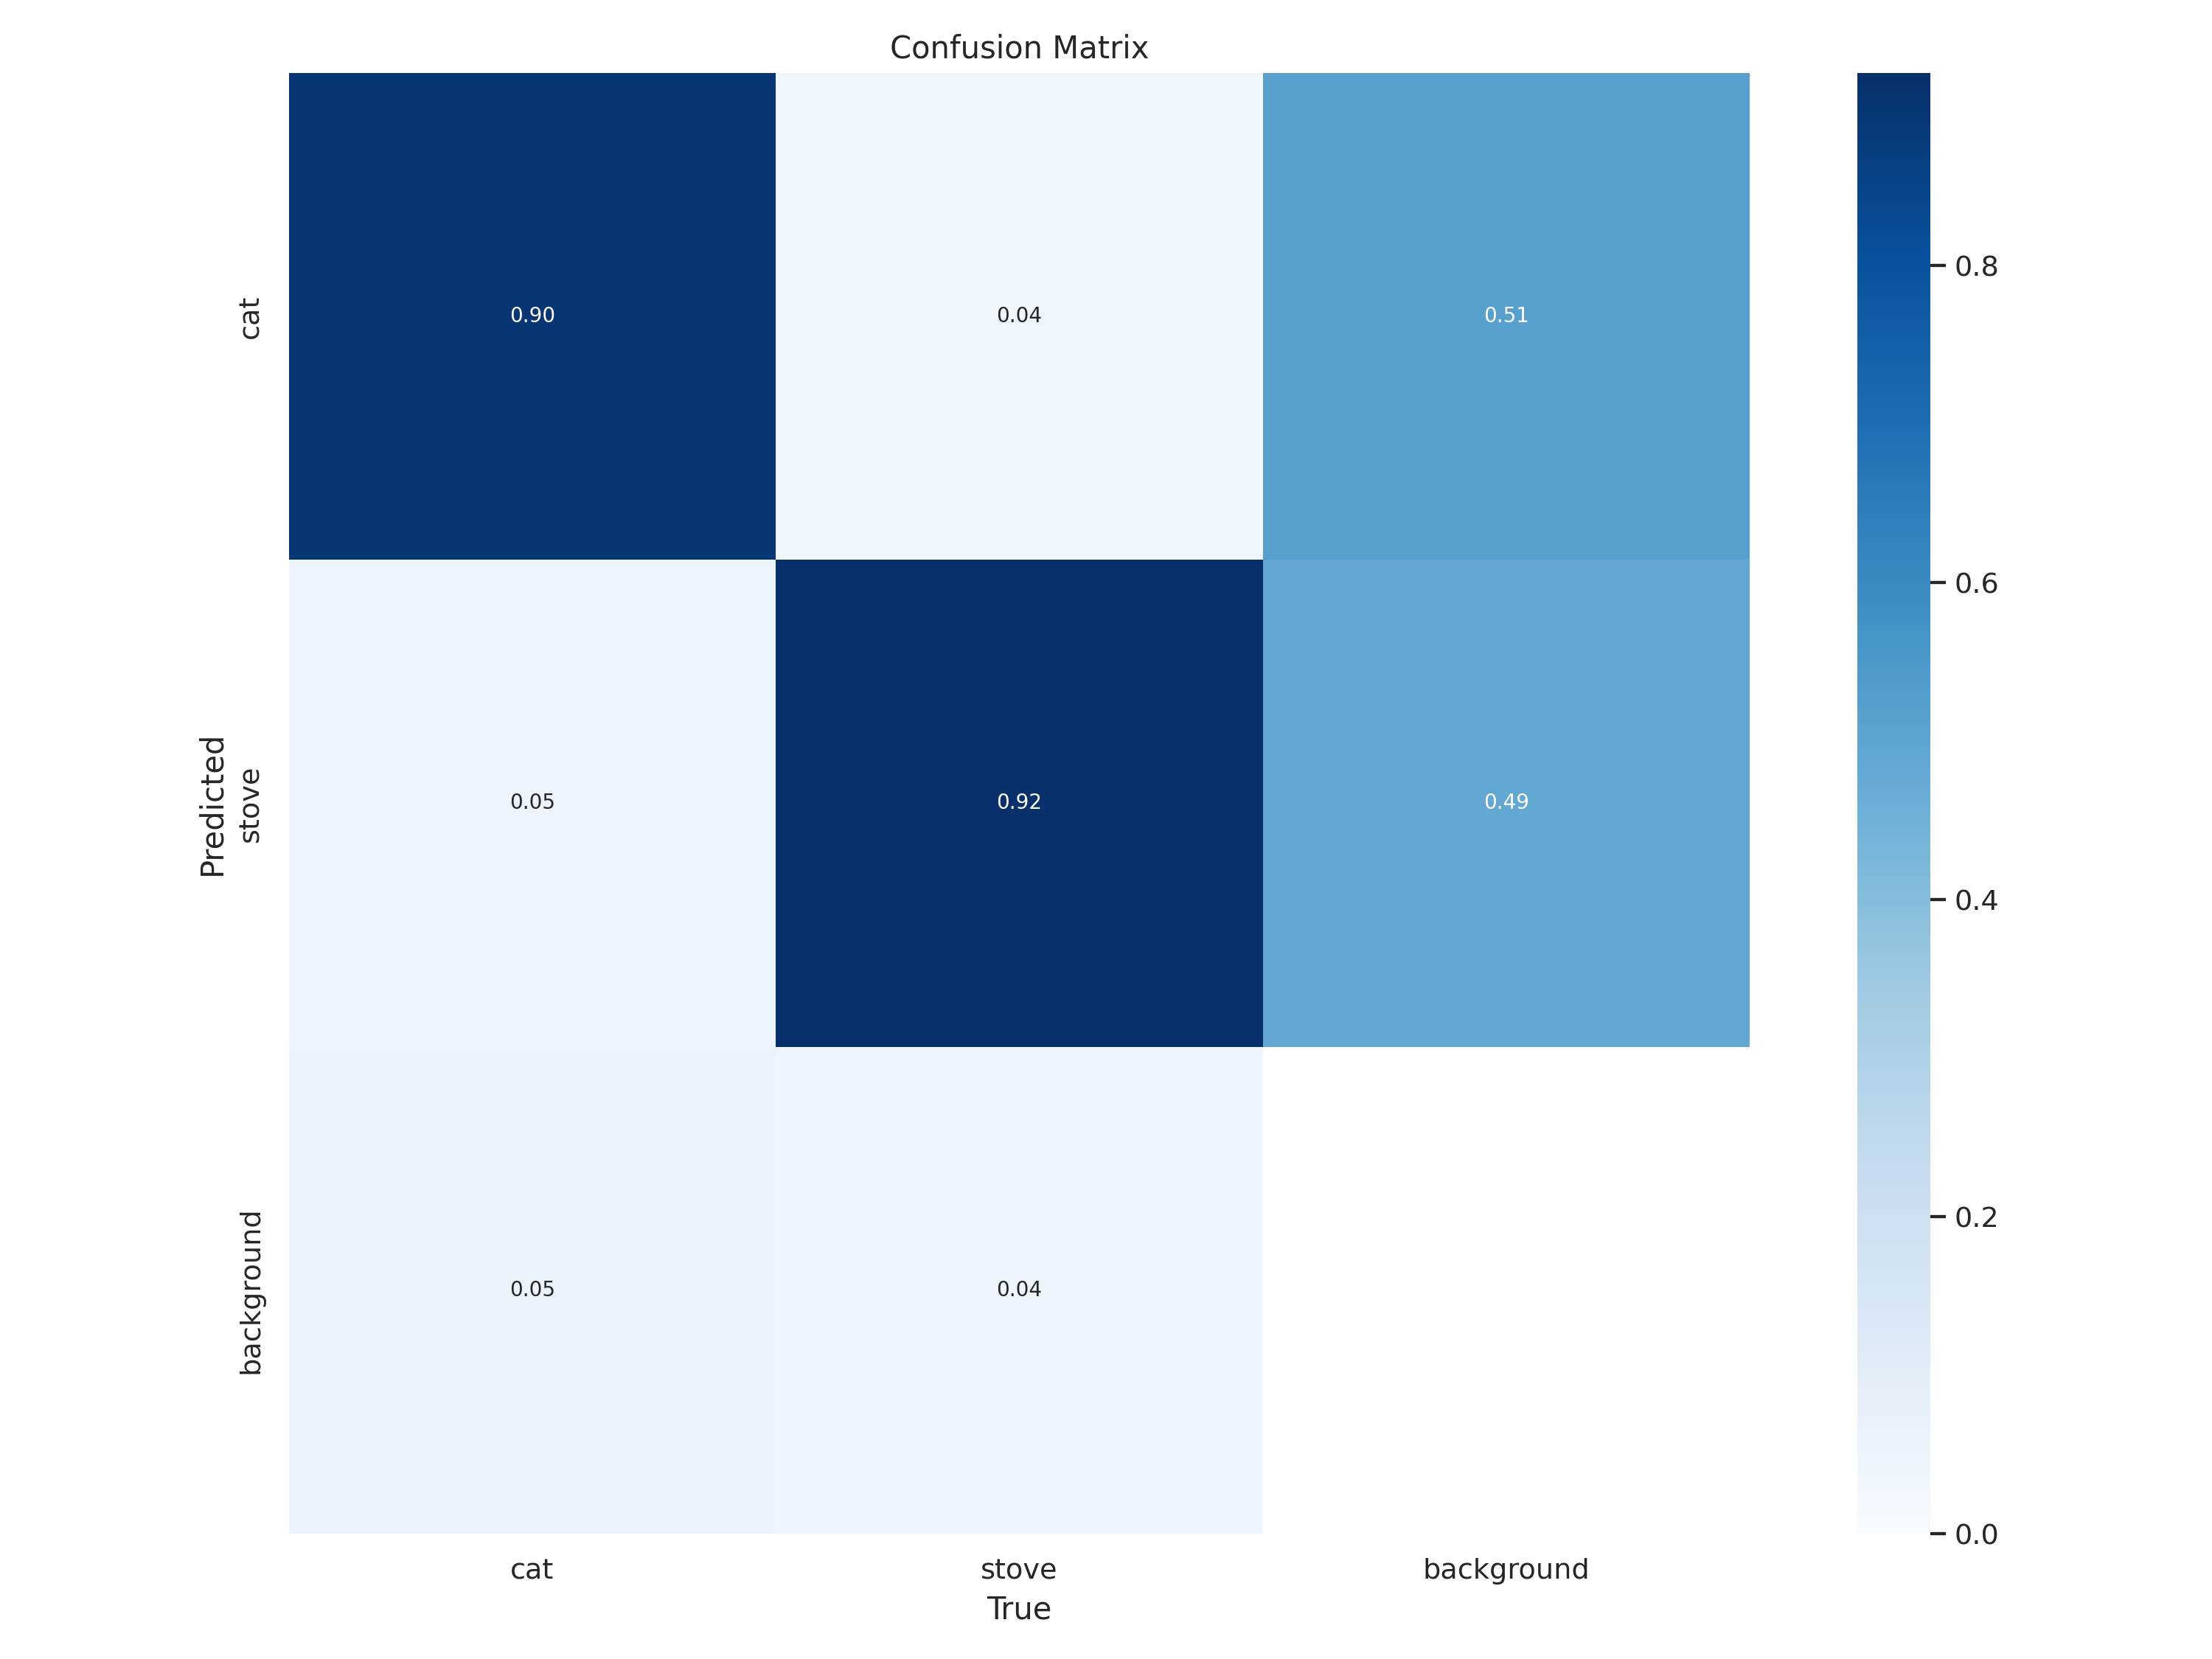

In [ ]:
Image(filename=f'/content/datasets/runs/detect/train/confusion_matrix.png') #, width=600)

[Errno 2] No such file or directory: 'content/datasets'
/content/datasets


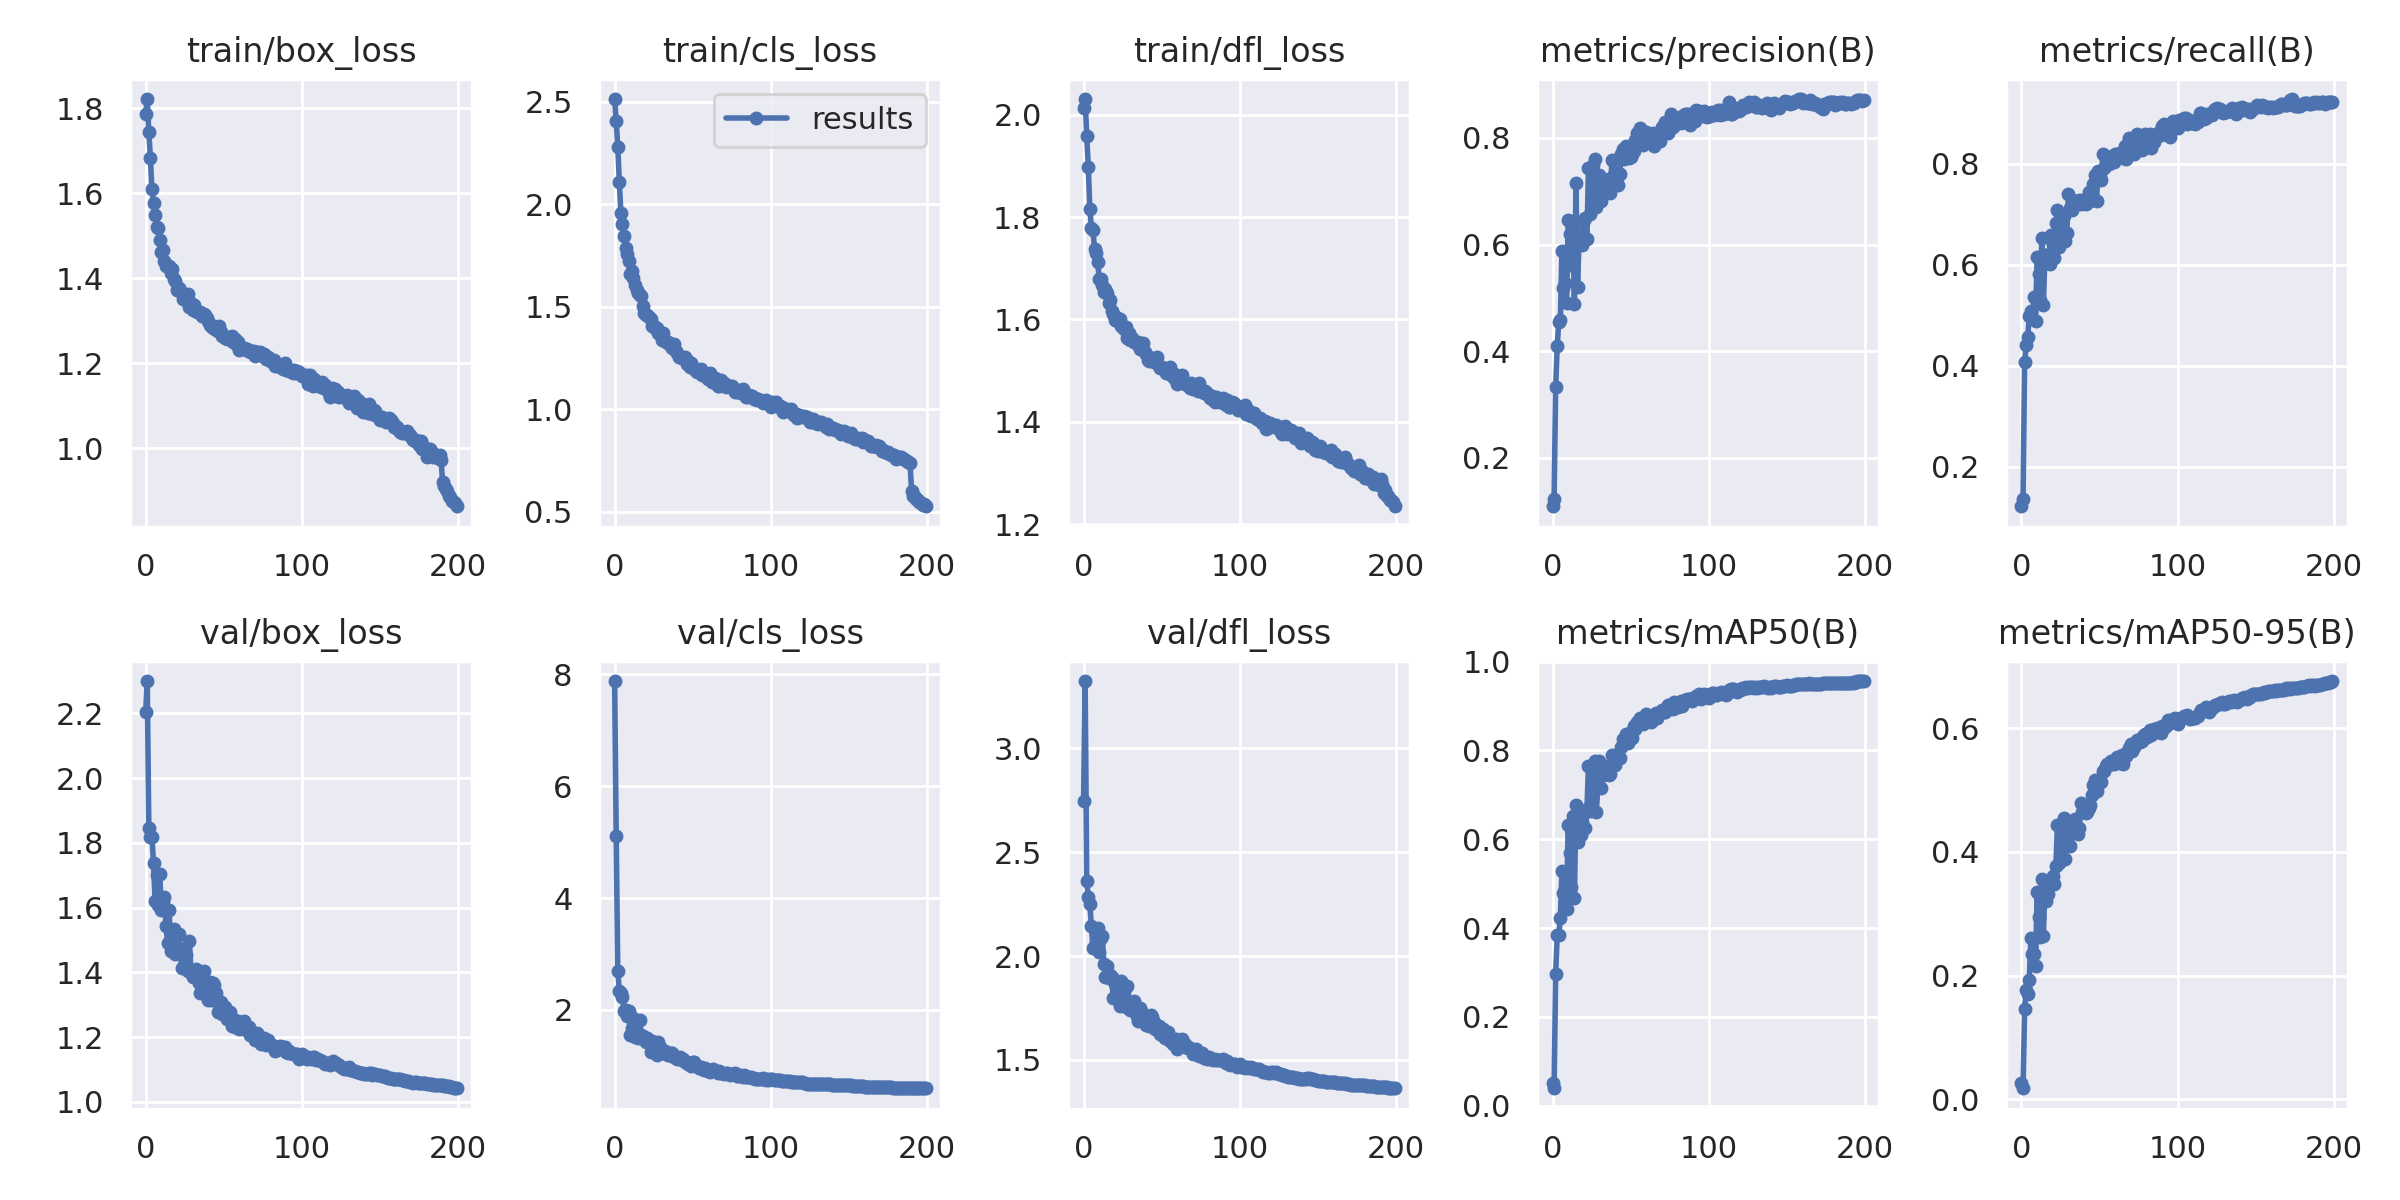

In [ ]:
%cd content/datasets
Image(filename=f'/content/datasets/runs/detect/train/results.png') #, width=600)

[Errno 2] No such file or directory: 'content/datasets'
/content/datasets


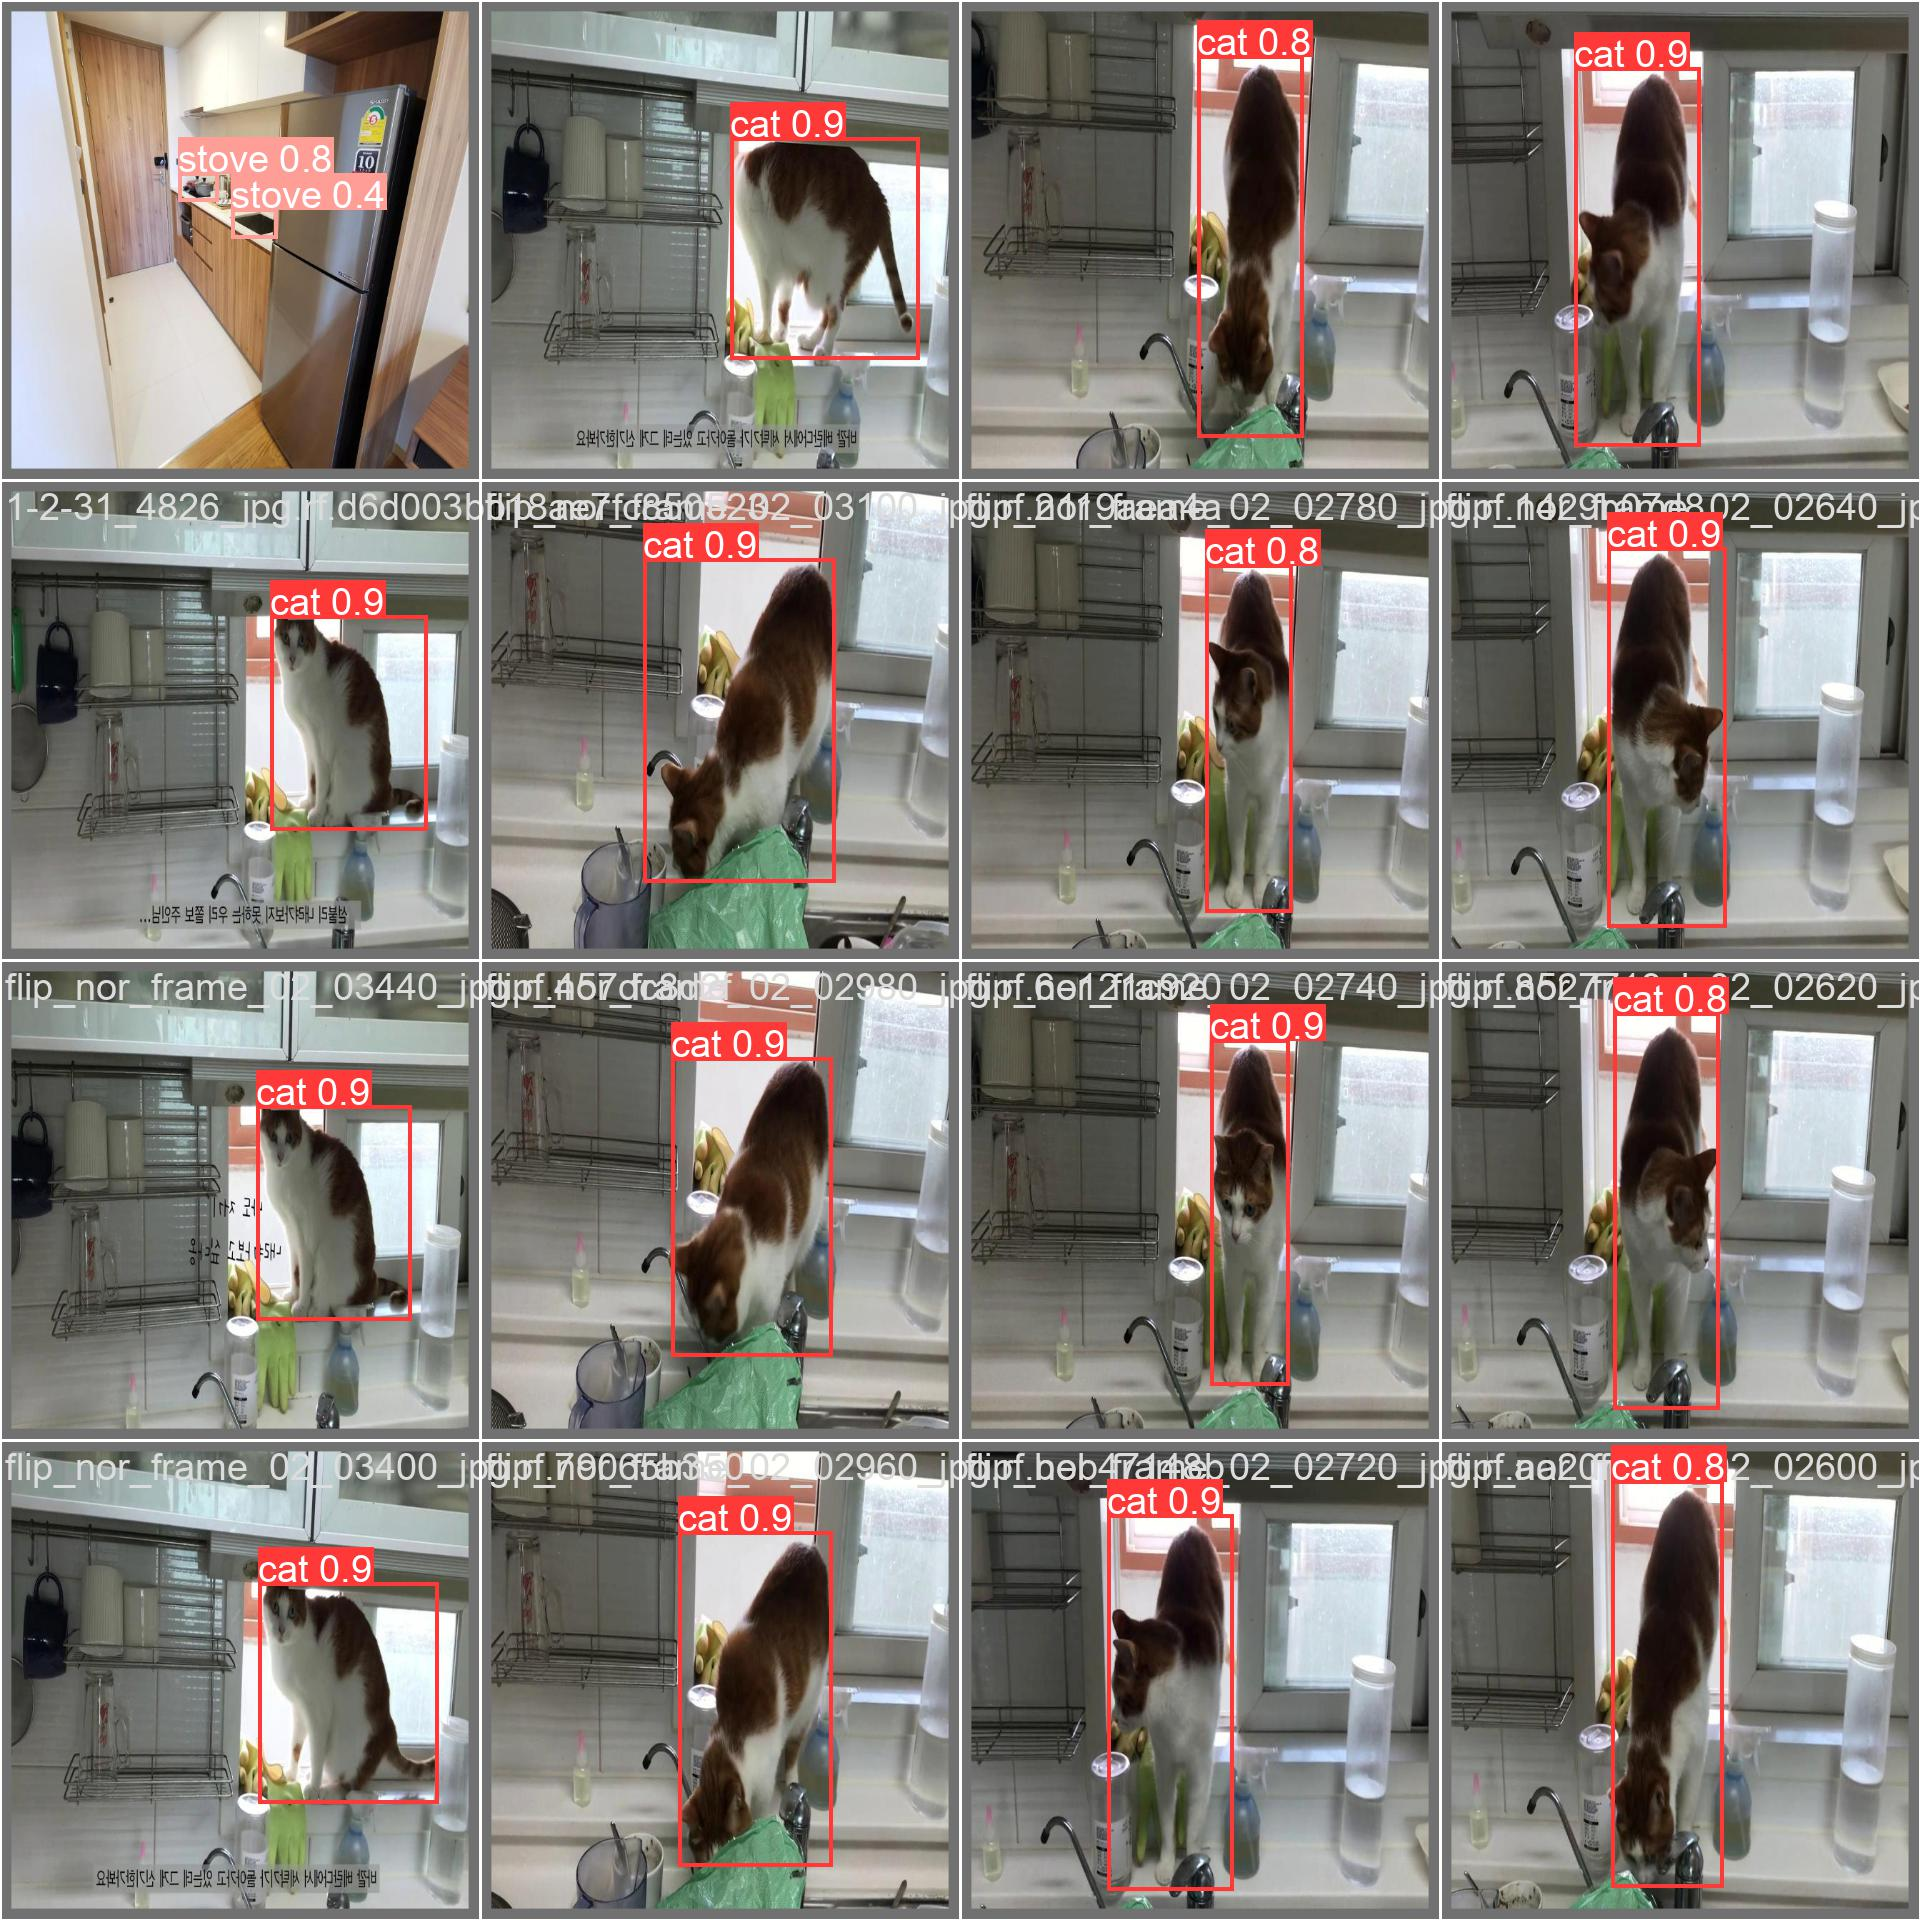

In [ ]:
%cd content/datasets
Image(filename=f'/content/datasets/runs/detect/train/val_batch0_pred.jpg') #, width=600)

# Validate Custom Model

In [ ]:
%cd content/datasets

!yolo task=detect mode=val model=/content/datasets/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

[Errno 2] No such file or directory: 'content/datasets'
/content/datasets
2023-08-05 05:16:24.228213: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-05 05:16:25.145892: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/datasets/Cat-stove-alert-2/valid/labels.cache... 1528 images, 0 backgrounds, 0 corrupt: 100% 1528/1528 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 96/96 [00:19<00:00,  5.02it/s]
                   all       1528       1584   

- Box: 객체 탐지 모델에서 예측한 경계 상자(Box)의 개수를 나타냅니다.
- P: 정확도(Precision)를 의미하며, 예측한 객체 중 실제로 정확한 객체로 판별된 비율을 나타냅니다.
- R: 재현율(Recall)을 의미하며, 실제 객체 중에서 정확히 예측된 객체의 비율을 나타냅니다.
- mAP50: 평균 정밀도(mAP)의 50% IOU 임계값에서의 값입니다. IOU는 예측한 경계 상자와 실제 객체의 중첩 정도를 측정하는 지표로, 임계값은 중첩 정도를 얼마나 유효한 것으로 간주할지 결정합니다. mAP50은 예측한 객체들의 정확도 평균을 나타냅니다.
- mAP50-95: 평균 정밀도의 50%에서 95%까지의 IOU 임계값 범위에서의 값입니다. 이는 예측한 객체들의 정확도 평균을 50%에서 95%까지의 다양한 IOU 임계값에 대해 계산하여 나타냅니다.

# Inference with Custom Model

In [ ]:
%cd /content/datasets
!yolo task=detect mode=predict model=/content/datasets/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content/datasets
2023-08-05 05:16:54.173817: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-05 05:16:55.108145: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs
image 1/757 /content/datasets/Cat-stove-alert-2/test/images/14-23-11_9042_jpg.rf.bc990f316466c0a373f0c5686550d2db.jpg: 640x640 1 stove, 8.6ms
image 2/757 /content/datasets/Cat-stove-alert-2/test/images/215029_1779_jpg.rf.c57859d7d6d7dfdb41269df92d7bd6f5.jpg: 640x640 1 stove, 7.4ms
image 3/757 /content/datasets/Cat-stove-alert-2/test/images/22-16_5735_jpg.rf.77b277f49f72

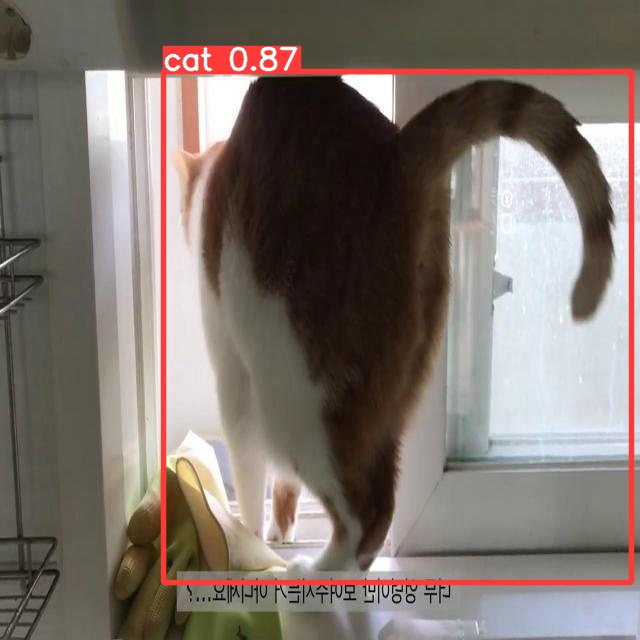

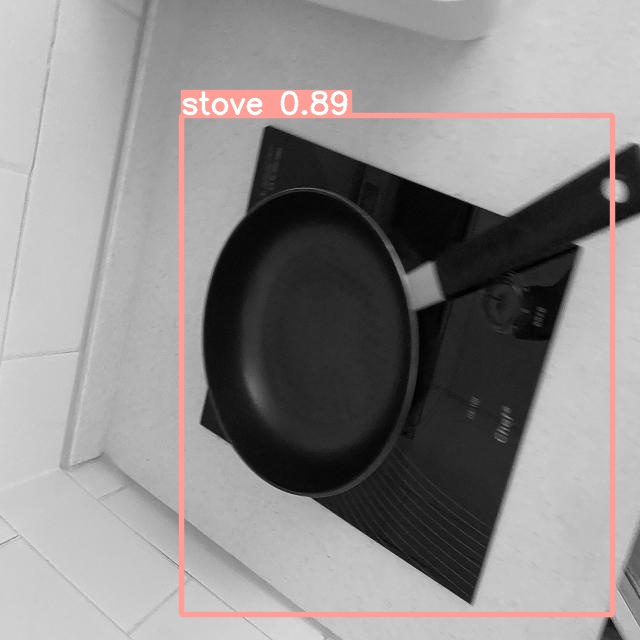

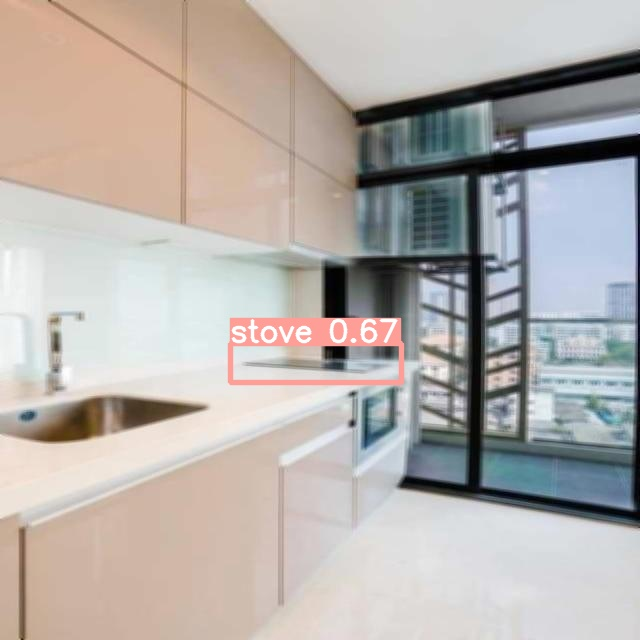

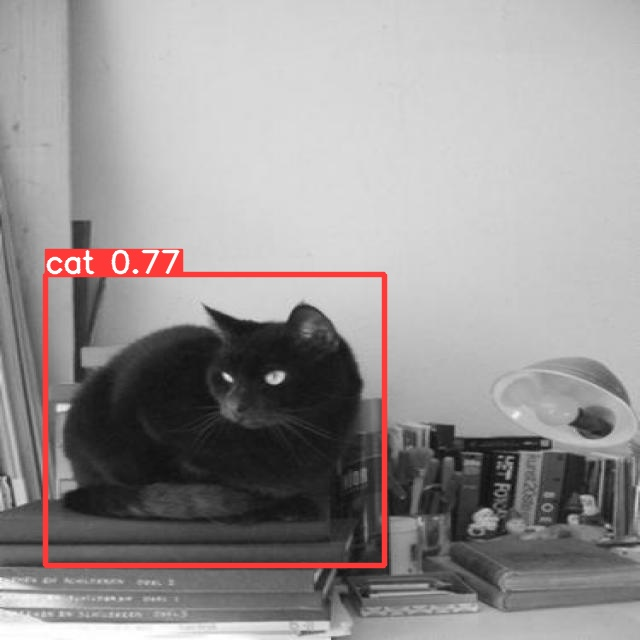

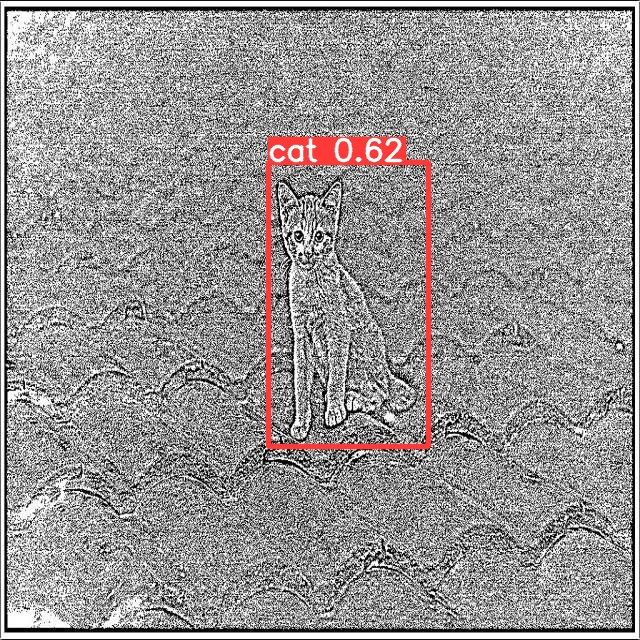

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/datasets/runs/detect/predict/*.jpg')[:5]:
      display(Image(filename=image_path, width=600))
      print("\n")